In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
%matplotlib inline
games_df = pd.read_csv("games.csv")

In [3]:
len(games_df)

20058

In [4]:
games_df.describe()

,created_at,last_move_at,turns,white_rating,black_rating,opening_ply
count,2.005800e+04,2.005800e+04,20058.000000,20058.000000,20058.000000,20058.000000
mean,1.483617e+12,1.483618e+12,60.465999,1596.631868,1588.831987,4.816981
std,2.850151e+10,2.850140e+10,33.570585,291.253376,291.036126,2.797152
min,1.376772e+12,1.376772e+12,1.000000,784.000000,789.000000,1.000000
25%,1.477548e+12,1.477548e+12,37.000000,1398.000000,1391.000000,3.000000
50%,1.496010e+12,1.496010e+12,55.000000,1567.000000,1562.000000,4.000000
75%,1.503170e+12,1.503170e+12,79.000000,1793.000000,1784.000000,6.000000
max,1.504493e+12,1.504494e+12,349.000000,2700.000000,2723.000000,28.000000


In [5]:
#get percentage of winner winning when r1 has a higher rating than r2
#example call: getwinners('white_rating', 'black_rating', 'white')
def getwinners(r1, r2, winner):
    #total times winner has won when r1>r2
    times_won = len(games_df[(games_df[r1] > games_df[r2]) & (games_df['winner'] == winner)])
    
    #total times r1>r2
    times_total = len(games_df[games_df[r1] > games_df[r2]])
    
    return f"Win percentage of {winner} when {r1[:-7]} has a higher rating: {round(times_won/times_total * 100)}"

In [6]:
print(getwinners('white_rating', 'black_rating', 'white'))
print(getwinners('white_rating', 'black_rating', 'black'))
print(getwinners('black_rating', 'white_rating', 'white'))
print(getwinners('black_rating', 'white_rating', 'black'))

Win percentage of white when white has a higher rating: 64
Win percentage of black when white has a higher rating: 31
Win percentage of white when black has a higher rating: 35
Win percentage of black when black has a higher rating: 60


As expected, the player with the higher rating usually wins the game. However, there is a difference of 4 percent between the black and white win percentage in each scenario - almost like white has an advantage...

In [7]:
gamesrated = games_df[games_df['rated']]
gamesnotrated = games_df[~games_df['rated']]

In [8]:
print('Number of unrated games that white won:', len(gamesnotrated.query("winner == 'white'")))
print('Number of unrated games that black won:', len(gamesnotrated.query("winner == 'black'")))
print('Number of unrated games that ended in a draw:', len(gamesnotrated.query("winner == 'draw'")))

Number of unrated games that white won: 1949
Number of unrated games that black won: 1723
Number of unrated games that ended in a draw: 231


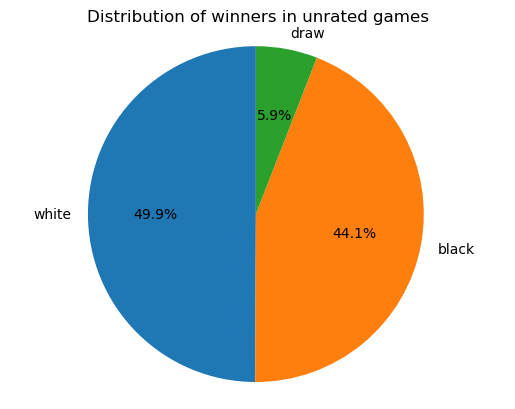

In [9]:
winner_counts = gamesnotrated['winner'].value_counts()
labels = winner_counts.index
sizes = (winner_counts / len(gamesnotrated)) * 100

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
ax1.axis('equal') 
ax1.set_title('Distribution of winners in unrated games')
plt.show()

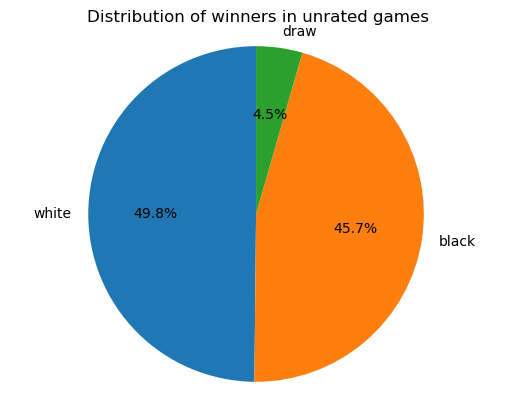

In [10]:
winner_counts = gamesrated['winner'].value_counts()
labels = winner_counts.index
sizes = (winner_counts / len(gamesnotrated)) * 100

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
ax1.axis('equal') 
ax1.set_title('Distribution of winners in unrated games')
plt.show()

The player playing white seems to have an obvious advantage over the player playing black, regardless of the ratings

In [11]:
games_df.groupby('winner').agg({'turns': 'mean'})

,turns
winner,
black,60.724388
draw,86.157895
white,57.790221


That's interesting. The matches that ended in a draw usually had more turns played than matches won by either side, as expected. However, the matches won by the player playing black seem to last more than 5 percent longer than those won by the player playing white.

In [12]:
games_df.groupby('rated').agg({'turns':'mean'})

,turns
rated,
False,54.271586
True,61.962550


The games that were rated generally had 7.7 more turns played per match than the unrated games